# Data camp 실습 코드

## 1. Supervised Learning with scikit-learn

### (1) Classification

In [4]:
import warnings; warnings.filterwarnings('ignore')
import sklearn
sklearn.__version__

# sklearn.neighbors.classification was renamed to sklearn.neighbors._classification in version 0.22.X
# Downgrade to scikit-learn version <= 0.21.3 to fix this problem
# (https://github.com/ageitgey/face_recognition/issues/1262)

# pip install --user --upgrade scikit-learn==0.21.3

'0.21.3'

#### **Classifying labels of unseen data**
1. Build a model
2. Model learns from the labeled data we pass to it (Labeled data = training data)
3. pass unlabeled data to the model as input
4. Model predicts the labels of the unseen data

#### k-Nearest Neighbors
* Predict the label of a data point by
  * Looking at the **k** closest labeled data points
  * Taking a majority vote

In [6]:
# KNN 사용법
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

X_new = np.array([[56.8, 17.5],
                 [24.4,24.1],
                 [50.1, 10.9]])
print(X_new.shape)

predictions = knn.predict(X_new)
print(f'Predictions: {predictions}')

#### Measuring model performance

* How do we measure accuracy?
* Could compute accuracy on the data used to fit the classifier
* Not indicative of ability to generalize
* Split data -> Training set / Test set

In [ ]:
# Train/test split
from sklearn.medel_selection import train_test_split
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

* Model Complexity
  * Larger k = less complex model = can cause underfitting
  * Smaller k = more complex model = can lead to overfitting

In [ ]:
# Model complexity and over/underfitting
import matplotlib.pyplot as plt

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)
    
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

### (2) Regression

#### Introduction to regression

In [ ]:
# Creating features

import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

In [ ]:
# Building a linear regression model

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

In [ ]:
# Visualizing a linear regression model

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

In [ ]:
# Fit and predict for regression
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

In [ ]:
# Regression preformance
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

#### Cross-validation

In [ ]:
# Cross-validation for R-squared

# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

In [ ]:
# Analyzing cross-validation metrics

# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

#### Regularized regression

* Ridge
  * Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In [ ]:
# Regularized regression: Ridge

# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
    ridge = Ridge(alpha=alpha)
  
  # Fit the data
    ridge.fit(X_train, y_train)
  
  # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
print(ridge_scores)

* Lasso
  * Lasso can select important features of a dataset (because shrinks the coefficients of less important features to zero)

In [ ]:
# Lasso regression for feature importance

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

### (3) Fine-Tuing Your Model

#### Assessing a diabetes prediction classifier

In [ ]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Building a logistic regression model

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

#### The ROC curve

In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#### ROC AUC

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

#### Hyperparameter tuning with GridSearchCV

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

#### Hyperparameter uning with RandomizedSearchCV

In [ ]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

## (4) Preprocessing data

#### Creating dummy variables

In [ ]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

#### Regression with categorical features

In [ ]:
# Create X and y
X = music_dummies.drop(columns='popularity', axis=1).values
y = music_dummies['popularity'].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")  # https://ai.stackexchange.com/questions/9022/can-the-mean-squared-error-be-negative

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))


#### Droping missing data

In [ ]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

#### Pipeline for song genre prediction: 1

In [ ]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

#### Pipeline for song genre prediction: 2

In [ ]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

#### Centering and scaling (Centering and scaling for regression)

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

#### Centering and scaling for classification

In [11]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}                          # 모델의 하이퍼파라미터 name = "logreg__C"로 해야 함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

#### Evaluating multiple models (Visualizing regression model performance)

* 상황마다 사용해야 하는 모델은 다름
* 기능이 적을수록 더 간단하고 빠름 (+ 해석 가능한 모델)

It's all in the metrics
* Regression model performance:
    * RMSE
    * R-squared
* Classification model performance:
    * Accuracy
    * Confusion matrix
    * Precision, recall, F1-score
    * ROC AUC  
  
A note on scaling
* Models affected by scaling
    * KNN
    * Linear Regression (+ Ridge, Lasso)
    * Logistic Regression
    * Artificiai Neural Network
* Best to scale our data before evaluating models

In [ ]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
    # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

#### Predicting on the test set

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate the test_rmse
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))

#### Visualizing classification model performance

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
    # Instantiate a KFold object
    kf = KFold(n_splits=6, random_state=12, shuffle=True)

    # Perform cross-validation
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

#### Pipeline for predicting song popularity

In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

# 이론 및 실습

## (1) Classification

### KNN

K-Nearest Neighbors
* 가장 간단한 ML Algorithm
* 분류/회귀 문제 모두에 적용 가능
* 훈련 데이터셋을 그냥 저장. 새로운 데이터 포인트를 예측할 땐 훈련 데이터셋에서 가장 가까운 데이터 포인트의 최근접 이웃을 찾음
    * 학습 데이터와의 거리를 계산해 근처에 있는 **K** 개의 점까지 데이터를 어떻게 분류했는지 확인 후 다수결로 데이터를 분류

Logic
* (1) 입력 데이터로 학습 데이터 거리 계산
* (2) 입력 데이터와 가까운 K개의 학습 데이터 탐색
* (3) 학습 데이터의 레이블에서 다수결로 알 수 없는 입력 데이터를 분류
    * K는 보통 홀수로 정해 다수결의 결과로 데이터를 어느 한 쪽으로 반드시 분류하게 만든다.
    

특징
* 이웃 수 (K)를 늘릴수록 결정 경계는 부드러워짐 -> 복잡도 낮아짐 (일반화 높아짐)
* KNN은 데이터 개수가 적거나 차원이 낮을 때 적합
* 작은 구성비를 가진 데이터들이 학습, 테스트 데이터로 분리될 경우, 제대로 된 학습이 어려움. 따라서, 구성비가 다른 불균형 데이터는 Stratified가 붙은 클래스를 이용하거나 train_test_split의 stratify 옵션 활용

In [101]:
import mglearn
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load_make_moons = make_moons()
load_breast_cancer = load_breast_cancer()

# dataframe
# moons = pd.DataFrame(data=load_make_moons, columns=load_make_moons.feature_names)
# moons.label = load_make_moons.target
cancer = pd.DataFrame(data=load_breast_cancer.data, columns=load_breast_cancer.feature_names)
cancer['label'] = load_breast_cancer.target

print(f"load_breast_cancer shape: {cancer.shape}")
display(cancer.head())

load_breast_cancer shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [102]:
# label (target data)의 불균형 체크
cancer_tar_bal = cancer.label.value_counts().to_frame().reset_index()
cancer_tar_bal['label_balance'] = round(cancer_tar_bal['label'] / sum(cancer_tar_bal['label']) * 100, 2)
display(cancer_tar_bal)

for i in cancer_tar_bal['label_balance']:
    if i >= 60:
        print("target 데이터 불균형함")

# KNN 모델 학습
knn_X = cancer.drop(columns=['label']).values
knn_y = cancer['label'].values
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.3, stratify=knn_y, random_state=42)

,index,label,label_balance
0,1,357,62.74
1,0,212,37.26


target 데이터 불균형함


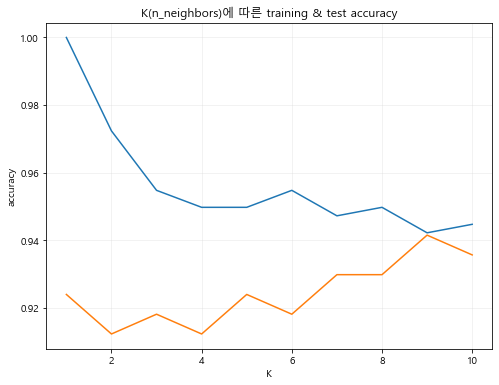

In [107]:
# KNN의 neighbors 수에 따른 결정경계

# _, axes = plt.subplots(2, 5, figsize=(15, 7))
# for k, ax in zip(k_li, axes.ravel()):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(knn_X_train, knn_y_train)
#     mglearn.plots.plot_2d_separator(classifier=knn, X=knn_X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
#     mglearn.discrete_scatter(knn_X_train[:, 0], knn_X_train[:, 1], knn_y_train, ax=ax)
#     ax.set_title(f"{k} neighbor")

# training and test 정확도 비교
train_acc, test_acc = [], []
k_li = range(1, 11) # k = 1~10

for k in k_li:
    # fitting model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(knn_X_train, knn_y_train)
    # training set accuracy
    train_acc.append(knn.score(knn_X_train, knn_y_train))
    # test set accuracy
    test_acc.append(knn.score(knn_X_test, knn_y_test))
    
plt.figure(figsize=(8, 6))
plt.plot(k_li, train_acc, label='학습용 데이터 accuracy')
plt.plot(k_li, test_acc, label='테스트용 데이터 accuracy')
plt.title('K(n_neighbors)에 따른 training & test accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.grid(color='lightgrey', alpha=0.34)

* k=9일 때 테스트 정확도 제일 높음

## (2) Regression

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭

In [129]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
label = boston.target
boston = pd.DataFrame(boston.data, columns=boston.feature_names)
boston['label'] = label
print(boston.shape)
display(boston.head())

# fitting model
X = boston.drop(columns=['label'], axis=1)
y = boston['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"절편: {lr.intercept_}")
print(f"회귀계수 값: {np.round(lr.coef_, 1)}\n\n")
print("각 컬럼의 회귀계수 값")
pd.DataFrame(data=np.round(lr.coef_, 1), index=X.columns.tolist()).sort_values(by=0, ascending=False).T

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


RMSE: 4.700924890603808
R2 score: 0.6844267283527068
절편: 29.83642016383853
회귀계수 값: [ -0.1   0.    0.    2.8 -16.2   4.4  -0.   -1.4   0.3  -0.   -0.9   0.
  -0.5]


각 컬럼의 회귀계수 값


,RM,CHAS,RAD,ZN,INDUS,AGE,TAX,B,CRIM,LSTAT,PTRATIO,DIS,NOX
0,4.4,2.8,0.3,0.0,0.0,-0.0,-0.0,0.0,-0.1,-0.5,-0.9,-1.4,-16.2


* 위의 회귀계수 값들을 최적화하는 과정이 최적의 회귀선을 구하는 것

### 교차 검증

In [138]:
from sklearn.model_selection import cross_val_score

# MSE 구한 후 RMSE 구함
neg_mse = cross_val_score(estimator=lr, X=X, y=y, scoring='neg_mean_squared_error', cv = 5)
rmse = np.sqrt(neg_mse * -1)

""" <cross_val_score의 scoring을 neg_mean_squared_error로 한 다음, -1을 곱하는 이유>
: cross_val_score는 RMSE를 제공하지 않으므로 MSE를 RMSE로 바꿔야 함.
다만, cross_val_score의 scoring을 neg_mean_squared_error로 하면 값이 음수 값으로 나오는데
(sklearn은 MSE에 음수를 취해서 오차를 점수로 바꿈. 점수가 클수록 좋은 것)
이 값에 -1을 곱해서 양수 값으로 만들어야 원래 모델에서 계산된 MSE와 같게 됨
"""

print(f"Negative mean Squared Error: {np.round(neg_mse, 1)}")
print(f"MSE: {np.round(neg_mse * -1, 1)}")
print(f"RMSE: {np.round(rmse, 1)}")
print(f"mean RMSE: {np.mean(np.round(rmse, 1))}")

Negative mean Squared Error: [-12.5 -26.  -33.1 -80.8 -33.3]
MSE: [12.5 26.  33.1 80.8 33.3]
RMSE: [3.5 5.1 5.8 9.  5.8]
mean RMSE: 5.84


### 규제 선형 모델

## (3) Fine-Tuning Your Model

* 오차율, 정확도(accuracy)는 분류 분석에서 가장 자주 사용하는 2가지 성능척도. 이진 분류 뿐만 아니라 다중 분류에서도 자주 사용.  
    - 오차율 : 모든 샘플 수에서 잘못 분류한 샘플 수가 차지하는 비율
    - 정확도 : 전체 샘플 수에서 정확히 분류한 샘플 수가 차지하는 비율
* 오차율, 정확도는 자주 사용되지만 모든 문제에 활용되진 못함. 
    - ex) 수박 장수가 수박을 손수레에 가득 담아 왔다. 그는 훈련된 모델을 통해 수박들을 분류하려고 하는데 여기서 오차율은 덜 익은 수박으로 분류되는 판별 오차율을 나타낼 수 있다. 그러나, 우리가 알고자 하는 건 '골라낸 수박 중에 잘 익은 수박의 비율', 혹은 '모든 잘 익은 수박 중 선택될 비율'이다. 여기서 오차율은 도움을 줄 수 없다.
    - ex) 정보 검색 중 일반적으로 확인하고자 하는 건 '검색된 자료 중 내가 관심있어 할 내용의 비율'이다.  

* 정밀도(precision)와 재현율(recall)이 이러한 요구에 맞는 성능 척도.  
    - 이진 분류 문제에서 실제 클래스와 학습기가 예측 분류한 클래스의 조합은 실제양성(true positive), 거짓양성(false positive), 실제음성(true negative), 거짓음성(false negative) 총 4가지로 요약
    - 각각 TP, FP, TN, FN으로 나타내며 TP + FP + TN + FN = 총 샘플 수'이다.
    - 이러한 분류 결과를 혼동행렬(confusion matrix)라고 함
        - 정밀도: 양성 예측의 정확도. TP / TP + FP
        - 재현율: 분류기가 정확하게 감지한 양성 샘플의 비율 (민감도 sensitivity, 진짜 양성 비율 true positive rate(TPR) 이라고도 함). TP / TP + FN
* F1-Score
    - 정밀도와 재현율을 하나의 숫자로 만든 것
    - 정밀도와 재현율의 조화평균
    - F1 = 2 / (1/정밀도 + 1/재현율) = 2 * (정밀도 * 재현율 / 정밀도 + 재현율) = TP / (TP + (FN + FP) / 2)

* Logistic regresson 을 활용한 평가
* ROC Curve (receiver operating characterstic Curve)
    * 이진 분류에서 많이 사용
    * 정밀도에 대한 재현율 곡선이 아님. 거짓 양성 비율(False positive rate, FPR)에 대한 진짜 양성 비율(True positive rate, TPR)의 곡선
        * FPR = 양성으로 잘못 분류된 음성 샘풀의 비율. 1 - TNR (음성으로 정확하게 분류한 음성 샘플의 비율)
            * TNR = 특이도(speicificity)라고도 함
    * 즉, ROC 곡선은 민감도(재현율)에 대한 1-특이도 그래프
    * ROC 곡선이 좌측 하단과 우측 상단을 이은 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것
* ROC AUC
    * 곡선 아래의 면적(area under the curve)을 측정하면 분류기들을 비교할 수 있음
    * 완벽한 분류기는 ROC의 AUC가 1, 완전한 랜덤 분류기는 0.5